#  Dry Bean Classification

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# reading the dataset
data=pd.read_csv('Dry_Bean_Dataset.csv')
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610291.00,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638018.00,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.11,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645884.00,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620134.00,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


# Exploring the dataset

In [3]:
data.shape

(13611, 17)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [5]:
data.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [6]:
data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,1.361100e+04,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,7.729110e+05,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,3.238848e+05,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,5.536000e+02,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,6.769955e+05,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,7.722730e+05,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,9.555000e+05,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1.921685e+06,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


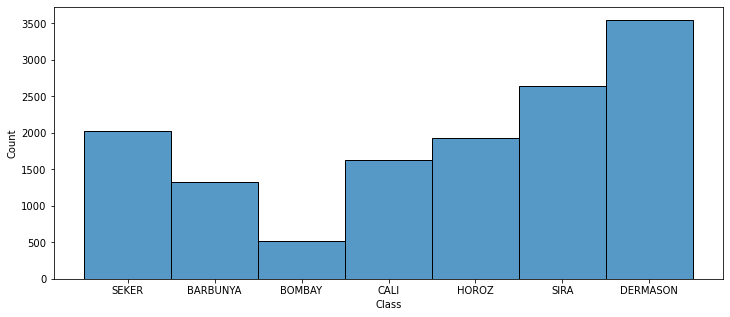

In [7]:
plt.figure(figsize=(12,5))
sns.histplot(data.Class)
plt.show()

In [8]:
data['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

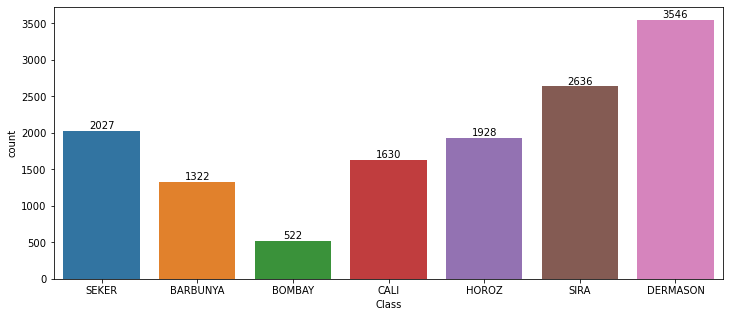

In [9]:
plt.figure(figsize=(12,5))
ax=sns.countplot(data.Class)
for bars in ax.containers:
    ax.bar_label(bars)
    
plt.show()

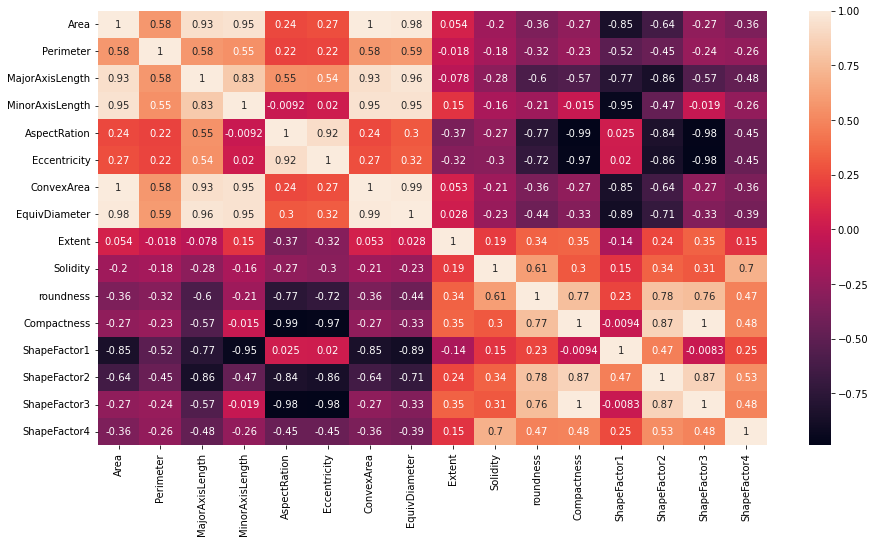

In [10]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

## The following correlations were noted:

   * Area: Perimeter, MajorAxisLength, MinorAxisLength, ConvexArea, EquivDiameter
   * Perimeter: Area, MajorAxisLength, MinorAxisLength, ConvexArea, EquivDiameter
   * MajorAxisLength: Area, Perimeter, MinorAxisLength, ConvexArea, EquivDiameter
   * MinorAxisLength: Area, Perimeter, MajorAxisLength, ConvexArea, EquivDiameter
   * ConvexArea: Area, Perimeter, MajorAxisLength, MinorAxisLength, EquivDiameter
   * EquivDiameter: Area, Perimeter, MajorAxisLength, MinorAxisLength, ConvexArea


### Attributes Histogram

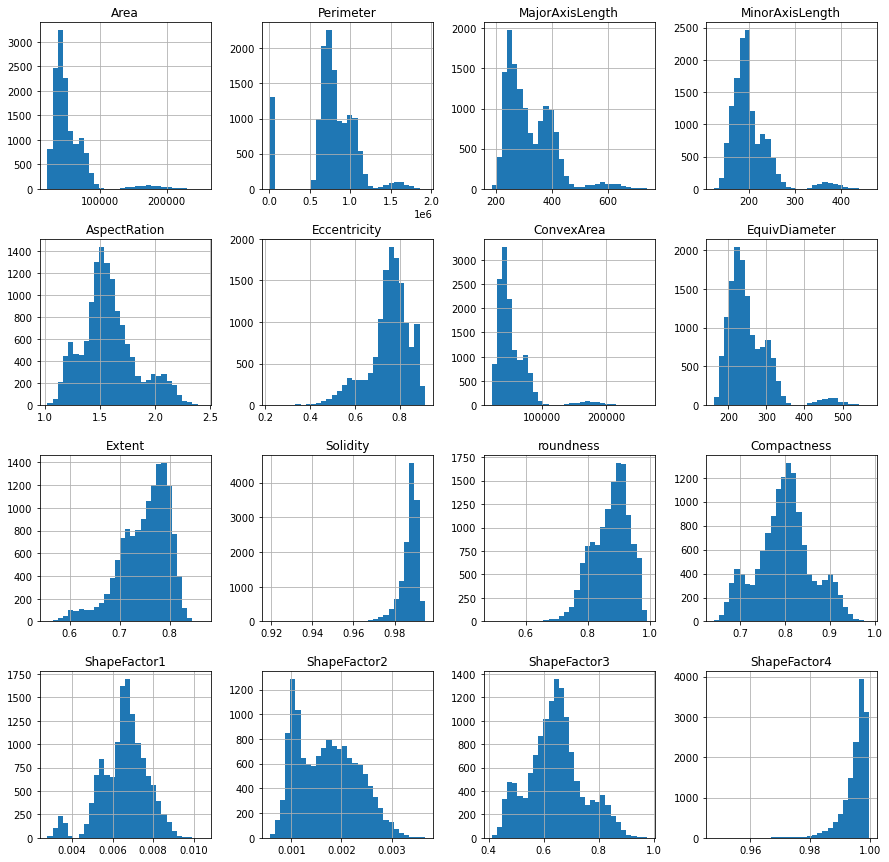

In [11]:
data.hist(bins=30, figsize=(15,15))
plt.show()

## Dataset splitting into train and test

In [12]:
from sklearn.model_selection import train_test_split 

In [13]:
x= data.iloc[:,:-1].values  
y= data.iloc[:, -1].values

In [14]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

## Feature scaling

In [15]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

### Importing evaluation libraries

In [16]:
from sklearn import metrics
from sklearn.metrics import precision_score,accuracy_score,recall_score,confusion_matrix
from sklearn.metrics import classification_report

## Logistic regression model

In [17]:
from sklearn.linear_model import LogisticRegression
regressor=LogisticRegression(random_state=0)
regressor.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [18]:
y_pred=regressor.predict(x_test)

In [19]:
regressor.score(x_test,y_test)

0.9265354099324126

In [20]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

    BARBUNYA       0.95      0.89      0.92       319
      BOMBAY       1.00      1.00      1.00       111
        CALI       0.93      0.95      0.94       419
    DERMASON       0.93      0.93      0.93       905
       HOROZ       0.95      0.96      0.95       491
       SEKER       0.96      0.95      0.96       470
        SIRA       0.87      0.88      0.87       688

    accuracy                           0.93      3403
   macro avg       0.94      0.94      0.94      3403
weighted avg       0.93      0.93      0.93      3403



In [21]:
Evaluation=pd.DataFrame(['LR'],columns=['Model'])


Evaluation.loc[0,'Model']='Logistic'
Evaluation.loc[0,'Precision']=metrics.precision_score(y_test, y_pred, average='micro')
Evaluation.loc[0,'Recall']=metrics.recall_score(y_test, y_pred, average='micro')
Evaluation.loc[0,'F1 Score']=metrics.f1_score(y_test, y_pred, average='micro')
Evaluation.loc[0,'Accuracy']=metrics.accuracy_score(y_test,y_pred)


### K Nearest Neighbour model

In [22]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [23]:
y_pred=classifier.predict(x_test)

In [24]:
classifier.score(x_test,y_test)

0.9227152512488981

In [25]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

    BARBUNYA       0.95      0.88      0.92       319
      BOMBAY       1.00      1.00      1.00       111
        CALI       0.92      0.96      0.94       419
    DERMASON       0.91      0.93      0.92       905
       HOROZ       0.97      0.96      0.96       491
       SEKER       0.95      0.95      0.95       470
        SIRA       0.87      0.86      0.86       688

    accuracy                           0.92      3403
   macro avg       0.94      0.93      0.94      3403
weighted avg       0.92      0.92      0.92      3403



In [26]:
Evaluation.loc[1,'Model']='KNN'
Evaluation.loc[1,'Precision']=metrics.precision_score(y_test, y_pred, average='micro')
Evaluation.loc[1,'Recall']=metrics.recall_score(y_test, y_pred, average='micro')
Evaluation.loc[1,'F1 Score']=metrics.f1_score(y_test, y_pred, average='micro')
Evaluation.loc[1,'Accuracy']=metrics.accuracy_score(y_test,y_pred)


### Decision tree model

In [27]:
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier()
dtc_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [28]:
y_pred = dtc_model.predict(x_test)

In [29]:
dtc_model.score(x_test,y_test)

0.8953864237437555

In [30]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

    BARBUNYA       0.89      0.91      0.90       319
      BOMBAY       1.00      1.00      1.00       111
        CALI       0.93      0.91      0.92       419
    DERMASON       0.89      0.89      0.89       905
       HOROZ       0.92      0.94      0.93       491
       SEKER       0.92      0.93      0.92       470
        SIRA       0.82      0.82      0.82       688

    accuracy                           0.90      3403
   macro avg       0.91      0.91      0.91      3403
weighted avg       0.90      0.90      0.90      3403



In [31]:
Evaluation.loc[2,'Model']='Decision Tree'
Evaluation.loc[2,'Precision']=metrics.precision_score(y_test, y_pred, average='micro')
Evaluation.loc[2,'Recall']=metrics.recall_score(y_test, y_pred, average='micro')
Evaluation.loc[2,'F1 Score']=metrics.f1_score(y_test, y_pred, average='micro')
Evaluation.loc[2,'Accuracy']=metrics.accuracy_score(y_test,y_pred)


### Naive Bayes model

In [32]:
from sklearn.naive_bayes import GaussianNB
cla = GaussianNB()
cla.fit(x_train, y_train)

GaussianNB()

In [33]:
y_pred=cla.predict(x_test)

In [34]:
cla.score(x_test,y_test)

0.9012635909491625

In [35]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

    BARBUNYA       0.87      0.81      0.84       319
      BOMBAY       1.00      1.00      1.00       111
        CALI       0.87      0.90      0.89       419
    DERMASON       0.93      0.89      0.91       905
       HOROZ       0.94      0.96      0.95       491
       SEKER       0.93      0.94      0.94       470
        SIRA       0.84      0.87      0.85       688

    accuracy                           0.90      3403
   macro avg       0.91      0.91      0.91      3403
weighted avg       0.90      0.90      0.90      3403



In [36]:
Evaluation.loc[3,'Model']='Naive Bayes'
Evaluation.loc[3,'Precision']=metrics.precision_score(y_test, y_pred, average='micro')
Evaluation.loc[3,'Recall']=metrics.recall_score(y_test, y_pred, average='micro')
Evaluation.loc[3,'F1 Score']=metrics.f1_score(y_test, y_pred, average='micro')
Evaluation.loc[3,'Accuracy']=metrics.accuracy_score(y_test,y_pred)


### Support vector machine model-linear

In [37]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [38]:
y_pred=classifier.predict(x_test)

In [39]:
classifier.score(x_test,y_test)

0.9259476932118719

In [40]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

    BARBUNYA       0.94      0.89      0.91       319
      BOMBAY       1.00      0.99      1.00       111
        CALI       0.94      0.94      0.94       419
    DERMASON       0.92      0.93      0.92       905
       HOROZ       0.96      0.96      0.96       491
       SEKER       0.95      0.95      0.95       470
        SIRA       0.87      0.87      0.87       688

    accuracy                           0.93      3403
   macro avg       0.94      0.93      0.94      3403
weighted avg       0.93      0.93      0.93      3403



In [41]:
Evaluation.loc[4,'Model']='SVM_linear'
Evaluation.loc[4,'Precision']=metrics.precision_score(y_test, y_pred, average='micro')
Evaluation.loc[4,'Recall']=metrics.recall_score(y_test, y_pred, average='micro')
Evaluation.loc[4,'F1 Score']=metrics.f1_score(y_test, y_pred, average='micro')
Evaluation.loc[4,'Accuracy']=metrics.accuracy_score(y_test,y_pred)


### Support vector machine model-rb

In [42]:
from sklearn.svm import SVC
cl = SVC(kernel = 'rbf')
cl.fit(x_train, y_train)
cl.score(x_test,y_test)

0.9300617102556568

In [43]:
y_pred=cl.predict(x_test)

In [44]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

    BARBUNYA       0.96      0.90      0.93       319
      BOMBAY       1.00      1.00      1.00       111
        CALI       0.93      0.95      0.94       419
    DERMASON       0.91      0.93      0.92       905
       HOROZ       0.97      0.95      0.96       491
       SEKER       0.96      0.95      0.96       470
        SIRA       0.88      0.88      0.88       688

    accuracy                           0.93      3403
   macro avg       0.95      0.94      0.94      3403
weighted avg       0.93      0.93      0.93      3403



In [45]:
Evaluation.loc[5,'Model']='SVM_rb funcion'
Evaluation.loc[5,'Precision']=metrics.precision_score(y_test, y_pred, average='micro')
Evaluation.loc[5,'Recall']=metrics.recall_score(y_test, y_pred, average='micro')
Evaluation.loc[5,'F1 Score']=metrics.f1_score(y_test, y_pred, average='micro')
Evaluation.loc[5,'Accuracy']=metrics.accuracy_score(y_test,y_pred)
Evaluation

,Model,Precision,Recall,F1 Score,Accuracy
0,Logistic,0.926535,0.926535,0.926535,0.926535
1,KNN,0.922715,0.922715,0.922715,0.922715
2,Decision Tree,0.895386,0.895386,0.895386,0.895386
3,Naive Bayes,0.901264,0.901264,0.901264,0.901264
4,SVM_linear,0.925948,0.925948,0.925948,0.925948
5,SVM_rb funcion,0.930062,0.930062,0.930062,0.930062


## Comparing the models

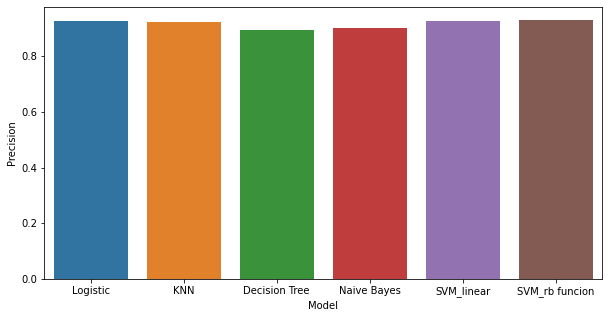

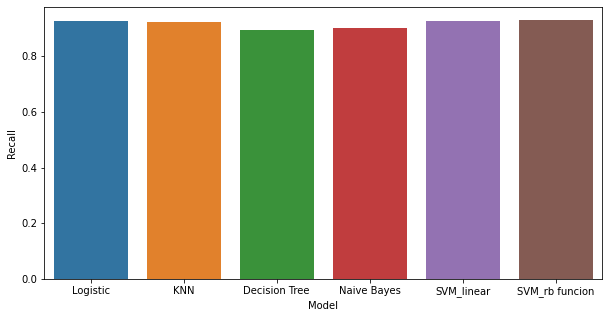

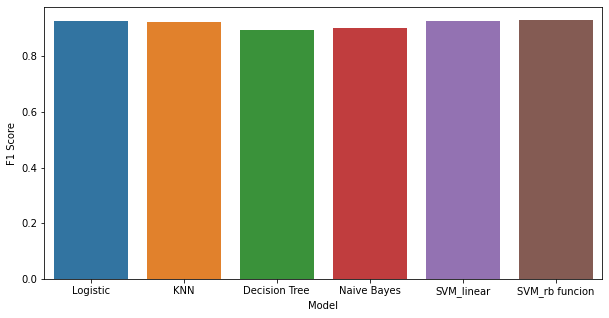

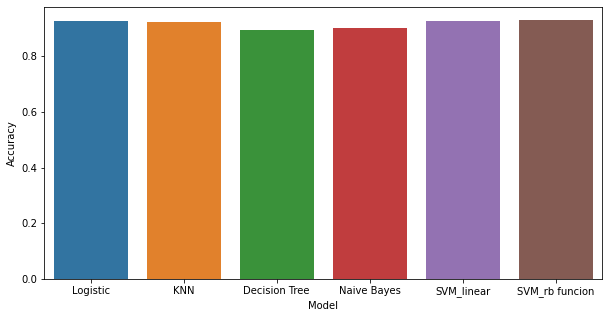

In [46]:
for col in Evaluation.iloc[:,1:].columns:
    plt.figure(figsize=(10,5))
    sns.barplot(x='Model',y=col,data=Evaluation)
    plt.show()

In [47]:
print('minimum recall model: ')
Evaluation[Evaluation.Recall==Evaluation.Recall.min()]

minimum recall model: 


,Model,Precision,Recall,F1 Score,Accuracy
2,Decision Tree,0.895386,0.895386,0.895386,0.895386


In [48]:
print('maximum recall model: ')
Evaluation[Evaluation.Recall==Evaluation.Recall.max()]

maximum recall model: 


,Model,Precision,Recall,F1 Score,Accuracy
5,SVM_rb funcion,0.930062,0.930062,0.930062,0.930062


In [49]:
print('minimum precision model: ')
Evaluation[Evaluation.Precision==Evaluation.Precision.min()]

minimum precision model: 


,Model,Precision,Recall,F1 Score,Accuracy
2,Decision Tree,0.895386,0.895386,0.895386,0.895386


In [50]:
print('maximum precision model: ')
Evaluation[Evaluation.Precision==Evaluation.Precision.max()]

maximum precision model: 


,Model,Precision,Recall,F1 Score,Accuracy
5,SVM_rb funcion,0.930062,0.930062,0.930062,0.930062


In [51]:
print('minimum accuracy model: ')
Evaluation[Evaluation.Accuracy==Evaluation.Accuracy.min()]

minimum accuracy model: 


,Model,Precision,Recall,F1 Score,Accuracy
2,Decision Tree,0.895386,0.895386,0.895386,0.895386


In [52]:
print('maximum accuracy model: ')
Evaluation[Evaluation.Accuracy==Evaluation.Accuracy.max()]

maximum accuracy model: 


,Model,Precision,Recall,F1 Score,Accuracy
5,SVM_rb funcion,0.930062,0.930062,0.930062,0.930062


### **CONCLUSION:**

 * LR and KNN gives same efficency which is 92%
  * Decision tree, Naive Bayes gives same efficency which is 90%
  * SVM_Linear and SVM_RBF gives same efficency which is 93%
  * Best can be SVM_rb Or SVM_linear